Librerías


In [4]:
#Importamos la librería para leer el fichero con los datos de conexión a la base de datos:
import os
from dotenv import load_dotenv

#Importamos las librerías necesarias para manejar los datos y crear las gráficas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerías necesarias para la conexión con la base de datos:

import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

In [5]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

De Limpieza.ipynb exporto el dataframe en un CSV, que importo a continuación para trabajar aquí con el mismo dataframe.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts

In [6]:
df = pd.read_csv(r'../Results/df.csv')

In [7]:
df.head()

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
0,4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"workspace, hot water, essentials, luggage drop..."
1,5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"stove, tv, hair dryer, essentials, wifi, heati..."
2,461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,...,90.0,100.0,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"hot water, essentials, luggage dropoff allowed..."
3,5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"workspace, hot water, essentials, luggage drop..."
4,5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"workspace, hot water, luggage dropoff allowed,..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6733 non-null   int64  
 1   apartment_id                 6733 non-null   int64  
 2   name                         6730 non-null   object 
 3   description                  6706 non-null   object 
 4   host_id                      6733 non-null   int64  
 5   neighbourhood_name           6733 non-null   object 
 6   neighbourhood_district       4075 non-null   object 
 7   room_type                    6733 non-null   object 
 8   accommodates                 6733 non-null   int64  
 9   bathrooms                    6706 non-null   float64
 10  bedrooms                     6706 non-null   float64
 11  beds                         6730 non-null   float64
 12  amenities_list               6716 non-null   object 
 13  price             

In [9]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,6.733000e+03,5516,5515,5446.000000,5437.000000,5443.000000,5432.000000,5441.000000,5431.000000,5431.000000,5516.000000,6733
unique,NaN,1790,1452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2041
mean,1.512717e+07,NaN,NaN,920.104664,94.539268,93.161859,96.277614,96.432641,95.273430,91.461978,122.733684,NaN
std,7.729288e+06,NaN,NaN,85.932940,9.108241,9.755222,8.010918,7.651143,7.322723,9.348894,152.617697,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,8.699662e+06,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,17.000000,NaN
50%,1.677280e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,56.000000,NaN
75%,2.148062e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,176.000000,NaN


In [10]:
# Imputar fecha de inserción del registro para los casos en que hay reseñas y la last_review_date es nula:

df.loc[df['last_review_date'].isna() & df['first_review_date'].notna(), 'last_review_date'] = df['insert_date']

In [11]:
df

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
0,4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"workspace, hot water, essentials, luggage drop..."
1,5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"stove, tv, hair dryer, essentials, wifi, heati..."
2,461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,...,90.0,100.0,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"hot water, essentials, luggage dropoff allowed..."
3,5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,...,100.0,100.0,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"workspace, hot water, essentials, luggage drop..."
4,5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"workspace, hot water, luggage dropoff allowed,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,880,3771149,"Central, double/twin, private bath","Classical-Style apartment, in the centre of Ba...",19327835,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,3.0,...,90.0,90.0,90.0,90.0,FALSO,228.0,spain,barcelona,2017-01-04,"bathroom essentials, tv, hangers, essentials, ..."
6729,895,3810717,Amazing flat in the very center,"Modern, beautiful and renewed flat at Born. Ve...",19587234,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,FALSO,33.0,spain,barcelona,2017-01-04,"translation missing: en.hosting_amenity_49, in..."
6730,902,3847290,Banyoles,Amplia habitaci�n exterior muy luminosa co...,19681580,el Barri G�tic,Ciutat Vella,Private room,2,1.0,...,100.0,100.0,100.0,100.0,FALSO,2.0,spain,barcelona,2017-01-04,"tv, family/kid friendly, essentials, wifi, hea..."
6731,2105,11411444,Cute apartment close to Pg.Gr�cia a,Cute apartment in Gracia! near Metro Diagonal...,14368366,la Vila de Gr�cia,Gr�cia,Entire home/apt,2,1.0,...,90.0,100.0,90.0,90.0,FALSO,147.0,spain,barcelona,2017-01-04,"tv, family/kid friendly, essentials, hair drye..."


Text(0.5, 0, 'N.º de reseñas')

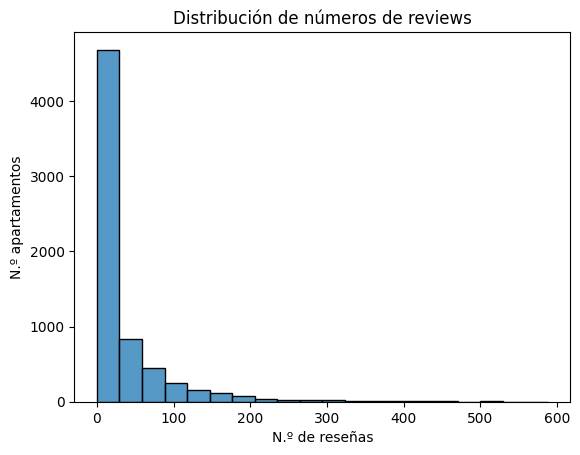

In [12]:
ax = sns.histplot(data=df, x='number_of_reviews', bins=20)
ax.set_title("Distribución de números de reviews")
ax.set_ylabel("N.º apartamentos")
ax.set_xlabel("N.º de reseñas")

Text(0.5, 0.98, 'Kde de distribución de reviews')

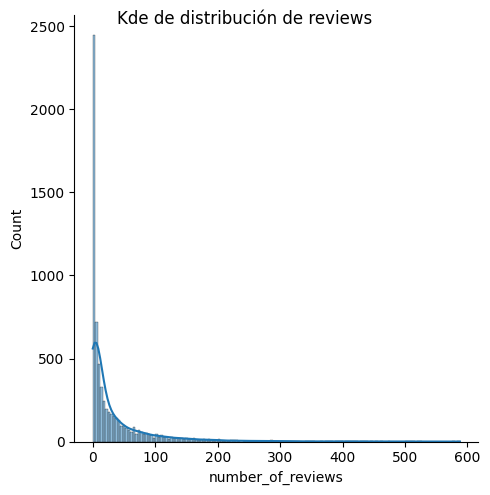

In [13]:
ax = sns.displot(data=df, x='number_of_reviews', kde=True)
ax.figure.suptitle("Kde de distribución de reviews")

Text(0.5, 1.0, 'Distribución estadística del rating total por ciudad')

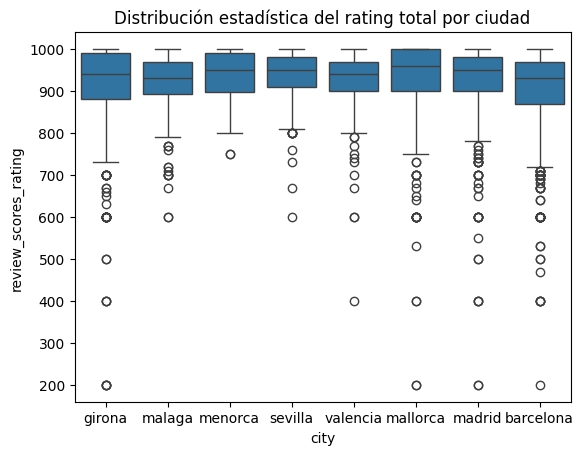

In [14]:
ax = sns.boxplot(data=df, x='city', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por ciudad")

Text(0.5, 1.0, 'Distribución estadística del rating total por tipo de alojamiento')

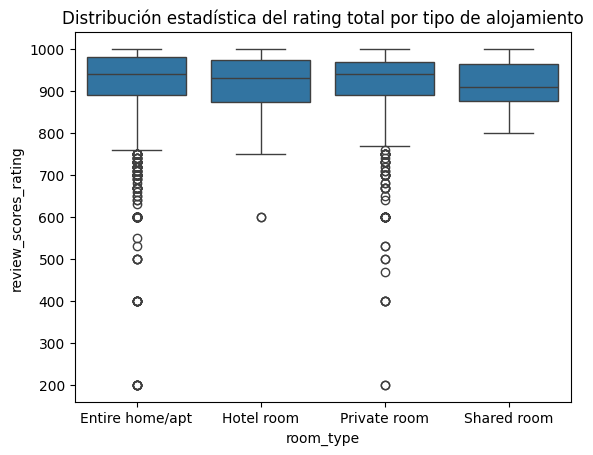

In [15]:
ax = sns.boxplot(data=df, x='room_type', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por tipo de alojamiento")

In [24]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 1217
Porcentaje de apartamentos sin reseñas: 18.08 %


In [29]:
top_apartamentos_puntos = df.sort_values(['review_scores_rating', 'number_of_reviews'], ascending=False)
top_apartamentos_puntos.head(10)

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
1811,2218,11989301,Vivienda San Mart�n II,Rel�jate y desconecta mientras la c�lida luz v...,34840363,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,4,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,394.0,spain,valencia,2019-12-31,"walk-in shower, hot water, essentials, en suit..."
2663,1783,9122183,Casa sevillana en barrio historico,Habitaci�n luminosa con terraza privada para u...,47528412,Pio XII,Macarena,Private room,2,2.0,...,100.0,100.0,90.0,100.0,FALSO,347.0,spain,sevilla,2019-07-29,"hot water, essentials, luggage dropoff allowed..."
239,5759,22979863,"Stylish Apt PZA MAYOR/La Latina 2BD* 2BT*, 6p max","Cozy and well-designed 2 bedroom apartment, co...",29281033,Palacio,Centro,Entire home/apt,6,2.0,...,100.0,100.0,100.0,100.0,VERDADERO,376.0,spain,madrid,2021-01-12,"workspace, hot water, luggage dropoff allowed,..."
1025,6072,23782265,Romantic and Rustic Penthouse with a Sun Kisse...,Marvel at an adorable cottage-like space in an...,40929334,ARRANCAPINS,EXTRAMURS,Entire home/apt,2,1.0,...,100.0,100.0,100.0,90.0,VERDADERO,501.0,spain,valencia,2020-05-31,"workspace, essentials, luggage dropoff allowed..."
784,5587,22479174,Private room in detached house,"Cozy private room in a detached villa, near Ad...",80975261,Rejas,San Blas - Canillejas,Private room,2,2.0,...,100.0,100.0,100.0,100.0,FALSO,327.0,spain,madrid,2020-08-25,"workspace, hot water, essentials, lock on bedr..."
1623,3365,16292600,BCN Luxury,Lujoso apartamento en pleno centro de Barcelon...,15944590,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,4,2.0,...,100.0,100.0,100.0,100.0,FALSO,274.0,spain,barcelona,2020-02-16,"hot water, essentials, luggage dropoff allowed..."
476,309,1073748,"MAGIC PLACE IN BARCELONA, WITH POOL",<b>The space</b><br />MAGIC PLACE IN BARCELONA...,5159312,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,4,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,101.0,spain,barcelona,2020-11-06,"workspace, hot water, luggage dropoff allowed,..."
574,3717,17384311,"Cubic House Garden, Cala Morlanda.",Cozy designer apartment located in a nice gar...,11087082,Manacor,NaN,Entire home/apt,3,1.0,...,100.0,100.0,90.0,100.0,VERDADERO,196.0,spain,mallorca,2020-10-21,"workspace, hot water, essentials, shower gel, ..."
1405,5404,21916433,Typical majorcan house in Llucmajor,Cozy 2 floors family house with 5 double bedro...,159911693,Llucmajor,NaN,Entire home/apt,10,3.0,...,100.0,100.0,90.0,100.0,FALSO,314.0,spain,mallorca,2020-03-22,"hot water, essentials, luggage dropoff allowed..."
3690,5408,21925668,�tico con piscina Triana 2mm del Centro de sev...,Nous sommes � Triana � 2mm du centre de Sevill...,15589434,Triana Casco Antiguo,Triana,Entire home/apt,7,2.0,...,100.0,100.0,100.0,100.0,VERDADERO,514.0,spain,sevilla,2019-02-18,"hot water, essentials, pets allowed, luggage d..."


In [30]:
top_apartamentos_num_reviews = df.sort_values(['number_of_reviews', 'review_scores_rating'], ascending=False)
top_apartamentos_num_reviews.head(10)

,Unnamed: 0,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities
2869,63,384727,Private Room in Center of Seville,"located in the centre of Seville, offers accom...",1920069,Arenal,Casco Antiguo,Private room,2,1.0,...,100.0,100.0,100.0,100.0,FALSO,681.0,spain,sevilla,2019-06-29,"translation missing: en.hosting_amenity_49, ba..."
1942,264,959840,PL REAL (Sq) PENTHOUSE Rooftop,"Rustic penthous with old beams,old ceramic flo...",5223863,el Barri G�tic,Ciutat Vella,Private room,2,2.0,...,100.0,100.0,100.0,100.0,VERDADERO,71.0,spain,barcelona,2019-12-10,"hot water, essentials, lock on bedroom door, l..."
1699,511,1871218,�tico apartamento VFT/SE/00804,"�tico muy luminoso. Consta de: Sal�n, Ba�o, Co...",9751847,"Le�n XIII, Los Naranjos",Macarena,Entire home/apt,2,1.0,...,100.0,100.0,90.0,80.0,VERDADERO,698.0,spain,sevilla,2020-01-30,"hot water, essentials, first aid kit, hangers,..."
857,729,3058631,"Private Studio in Sol, Madrid","We are offering a clean, well presented and re...",14370747,Sol,Centro,Entire home/apt,3,1.0,...,100.0,100.0,100.0,90.0,FALSO,698.0,spain,madrid,2020-07-17,"workspace, hot water, essentials, oven, refrig..."
245,98,526513,Sol. Your home in Madrid�s Heart,DESIGN apartment in the HEART of Madrid.<br />...,1134989,Sol,Centro,Entire home/apt,5,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,491.0,spain,madrid,2021-01-12,"workspace, hot water, luggage dropoff allowed,..."
577,753,3143400,Great room in the center of Madrid,"Bright room in hortaleza Street, next to Gran ...",15328893,Justicia,Centro,Private room,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,773.0,spain,madrid,2020-10-17,"essentials, oven, refrigerator, dishes and sil..."
2991,145,681925,"Very Central, Stunning Views, Sunny Terrace, W...",FANTASTIC PENTHOUSE LOCATED IN THE CENTER OF V...,3462415,EL PILAR,CIUTAT VELLA,Entire home/apt,2,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,624.0,spain,valencia,2019-05-31,"hot water, essentials, first aid kit, refriger..."
626,478,1670427,Walk everywhere!Brand new apartWIFI,The apartment is right in the center of Barce...,8843962,la Dreta de l'Eixample,Eixample,Entire home/apt,5,1.0,...,100.0,100.0,100.0,90.0,VERDADERO,588.0,spain,barcelona,2020-10-12,"workspace, hot water, essentials, refrigerator..."
1464,936,4028518,Renovated & Vintage en Barcelona,Welcome to this cozy apartment located in the ...,20886062,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.0,...,100.0,100.0,100.0,100.0,VERDADERO,712.0,spain,barcelona,2020-03-16,"hot water, essentials, first aid kit, ev charg..."
1461,1313,6289283,Cozy apartment near El Raval,Nice bright room with large private terrace (p...,32695481,el Raval,Ciutat Vella,Private room,2,1.0,...,100.0,90.0,90.0,90.0,VERDADERO,78.0,spain,barcelona,2020-03-16,"hot water, essentials, lock on bedroom door, r..."
